# Exploratory data analysis (Naukri)

- Feature engineering

In [7]:
# Author: Priti Gupta
# Date: June 8th, 2023
# Description: Scrapping data from glassdoor to analyse salaries of data science positions in India
# GitHub: https://github.com/PritiG1/DS-SalaryPredictor

import pandas as pd

df = pd.read_csv('salary_clean_naukri.csv')
pd.set_option('display.max_rows',None)

In [20]:
# write a code to simplify job designations

def title_simplify(title):

    if 'data scientist' in title.lower() or 'architect' in title.lower() or 'big data' in title.lower():
        return 'Data Scientist'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'Data Analyst'
    elif 'intern' in title.lower():
        return 'Data science Intern'
    elif 'ml engineer' in title.lower() or 'artificial intelligence' in title.lower()\
          or 'machine learning engineer' in title.lower() or 'ai engineer' in title.lower() or 'nlp' in title.lower() or 'science' in title.lower():
        return 'ML Engineer'
    elif 'data engineer' in title.lower() or 'data science engineer' in title.lower():
        return 'data engineer'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'lead' in title.lower():
        return 'Lead'
    elif 'developer' in title.lower() or 'python' in title.lower():
        return 'python developer'
    else:
        return 'na'

df['Job title'] = df['Title'].apply(lambda x: title_simplify(x))

In [21]:
df['Job title'].value_counts()

Job title
Data Analyst        254
data engineer       245
Data Scientist      106
na                   84
python developer     73
ML Engineer          38
Lead                 16
manager               6
Name: count, dtype: int64

In [22]:
# rearranging the coloumns
last_column = df.columns[-1]  # Get the name of the last column
df.insert(0, last_column, df.pop(last_column))


In [23]:
df.drop('Title',axis=1,inplace=True)
df.to_csv('FE_naukri_salary.csv',index=False)

In [24]:
df['Job title'].value_counts()

Job title
Data Analyst        254
data engineer       245
Data Scientist      106
na                   84
python developer     73
ML Engineer          38
Lead                 16
manager               6
Name: count, dtype: int64

## Visualisation of data (Naukri)

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('FE_naukri_salary.csv')

df.columns


Index(['Job title', 'Company', 'Experience', 'Location', 'Salary',
       'Salary (L)', 'min Salary (L)', 'max Salary (L)', 'avg salary (L)',
       'Experience (yrs)', 'min Experience (yrs)', 'max Experience (yrs)',
       'avg Experience (yrs)'],
      dtype='object')

In [3]:
def loc_simplifier(location):
    if 'bangalore' in location.lower() or 'bengaluru' in location.lower() or 'karnataka' in location.lower():
        return 'Bangalore'
    elif 'mumbai' in location.lower() or 'maharashtra' in location.lower() or 'thane' in location.lower():
        return 'Maharashtra' 
    elif 'hyderabad' in location.lower():
        return 'hyderabad'
    elif 'delhi' in location.lower() or 'gurugram' in location.lower() or 'gurgaon' in location.lower():
        return 'Gurugram'
    elif 'noida' in location.lower() or 'uttar pradesh' in location.lower() or 'lucknow' in location.lower():
        return 'Uttar pradesh'
    elif 'hybrid' in location.lower():
        return 'Hybrid'
    elif 'chennai' in location.lower():
        return 'Chennai'
    elif 'ahmedabad' in location.lower() or 'gujrat' in location.lower() or 'surat' in location.lower()\
        or 'gandhinagar' in location.lower():
        return 'Gujrat'
    elif 'chandigarh' in location.lower() or 'haryana' in location.lower() or 'mohali' in location.lower():
        return 'chandigarh'
    elif 'pune' in location.lower():
        return 'Pune'
    elif 'kolkata' in location.lower():
        return 'Kolkata'
    elif 'kochi' in location.lower() or 'trivandrum' in location.lower() or 'kerala' in location.lower():
        return 'Kerala'
    elif 'remote' in location.lower():
        return 'remote'
    else:
        return 'Misc'
    
df['Location'] = df['Location'].apply(lambda x: loc_simplifier(x))

In [4]:
df.Location.value_counts()

Location
Bangalore        349
Maharashtra       78
remote            77
Gurugram          77
hyderabad         65
Pune              33
Hybrid            30
Chennai           27
Uttar pradesh     25
Misc              23
Gujrat            14
chandigarh         9
Kolkata            8
Kerala             7
Name: count, dtype: int64

In [5]:
# summary stats of salary irrespective of glassdoor or employer estimate.
df = df[df['Job title'] != 'na']

df[['avg salary (L)','min Salary (L)','max Salary (L)']].describe()

,avg salary (L),min Salary (L),max Salary (L)
count,738.000000,738.000000,738.000000
mean,14.813957,11.251355,18.376558
std,9.598750,8.271646,11.213094
min,0.500000,0.500000,0.500000
25%,7.500000,5.000000,9.500000
50%,13.500000,10.000000,18.000000
75%,20.000000,15.000000,25.000000
max,57.500000,50.000000,80.000000


In [6]:
df['Job title'].value_counts()

Job title
Data Analyst        254
data engineer       245
Data Scientist      106
python developer     73
ML Engineer          38
Lead                 16
manager               6
Name: count, dtype: int64

### Plots

In [7]:
df.columns

Index(['Job title', 'Company', 'Experience', 'Location', 'Salary',
       'Salary (L)', 'min Salary (L)', 'max Salary (L)', 'avg salary (L)',
       'Experience (yrs)', 'min Experience (yrs)', 'max Experience (yrs)',
       'avg Experience (yrs)'],
      dtype='object')

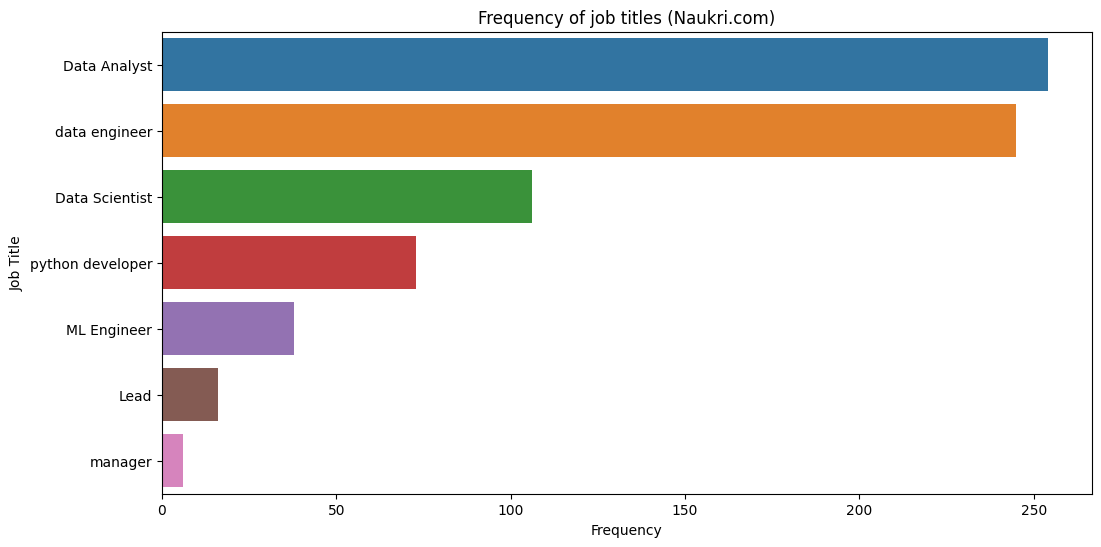

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
Job_Title = df['Job title'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=Job_Title.values, y=Job_Title.index)
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.title('Frequency of job titles (Naukri.com)')
plt.show()


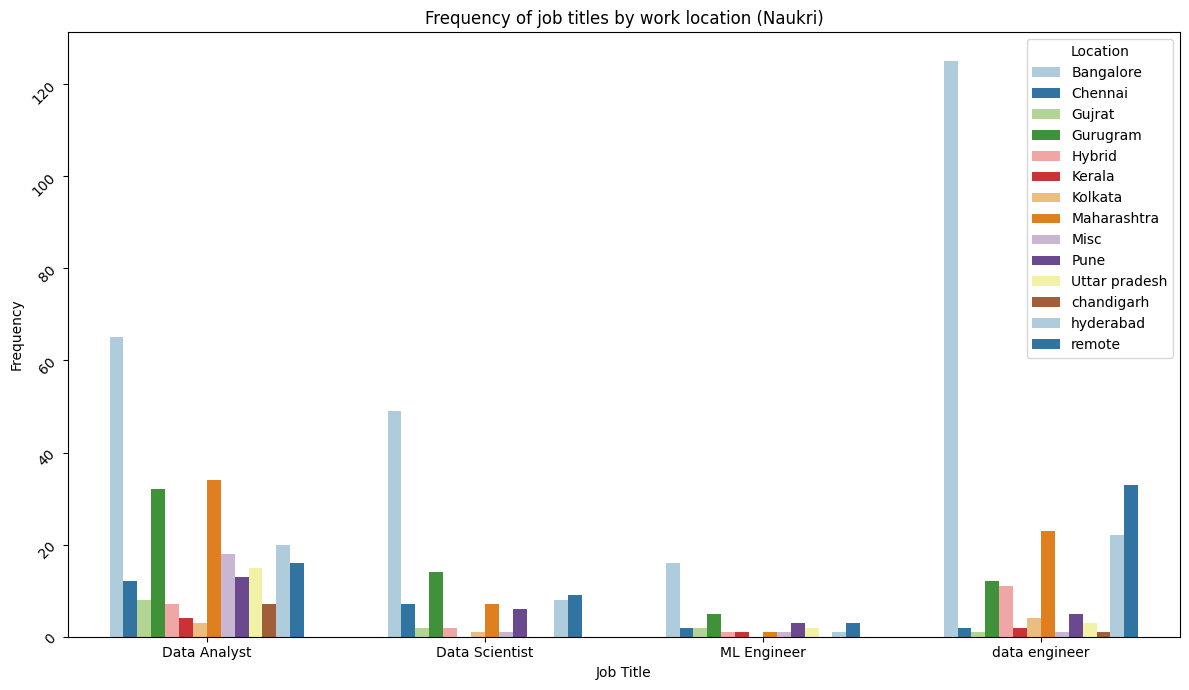

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
title_counts = df.groupby(['Job title', 'Location']).size().reset_index(name='Frequency')

# Filter specific job titles
specific_titles = ['Data Scientist', 'Data Analyst','data engineer','ML Engineer']
title_counts = title_counts[title_counts['Job title'].isin(specific_titles)]

# Plotting the bar plot
plt.figure(figsize=(12, 7))  # Adjust the figure size as needed
sns.barplot(y='Frequency', x='Job title', hue='Location', data=title_counts, palette='Paired', width=0.7)
plt.ylabel('Frequency')
plt.xlabel('Job Title')
plt.title('Frequency of job titles by work location (Naukri)')
plt.legend(title='Location', bbox_to_anchor=(1, 1), loc='upper right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()  # Improve the spacing between subplots and labels
plt.show()


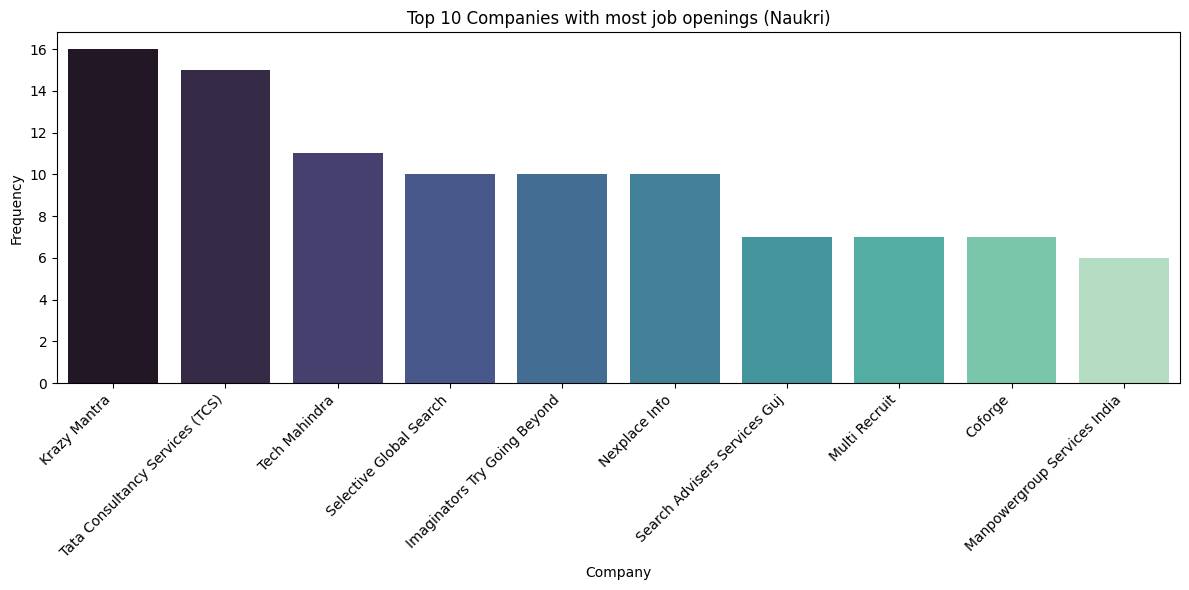

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Title' and 'Company' are the respective columns in your DataFrame
company_counts = df['Company'].value_counts().nlargest(10)  # Select the top 10 companies

# Replace a specific long label with a different name
#company_counts.index = company_counts.index.where(company_counts.index != 'Mercedes-Benz Research and Development India Private Limited', 'Mercedes-Benz R&D')

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=company_counts.index, y=company_counts.values, palette=('mako'))
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Top 10 Companies with most job openings (Naukri)')
plt.xticks(rotation=45, ha='right')
#sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
#------------------------------------------------------------

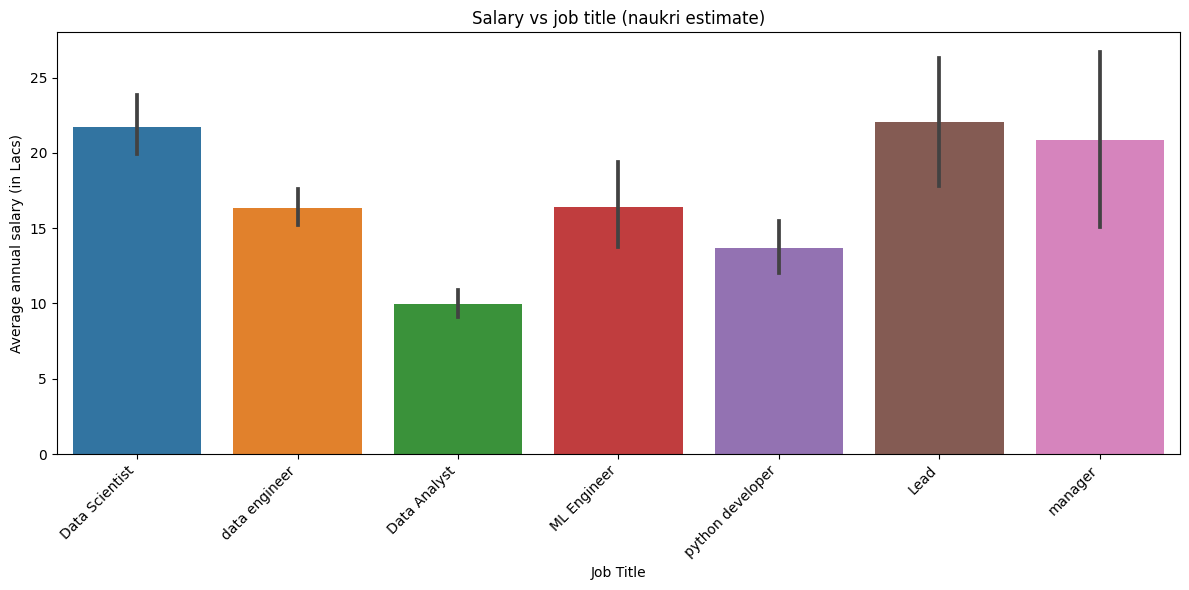

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'job' and 'salary' are the respective columns in your DataFrame
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Job title', y='avg salary (L)', data=df)
plt.xlabel('Job Title')
plt.ylabel('Average annual salary (in Lacs)')
plt.title('Salary vs job title (naukri estimate)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
df['Job title'].value_counts()

Job title
Data Scientist         514
Data science Intern     97
ML Engineer             59
Data Analyst            55
Name: count, dtype: int64

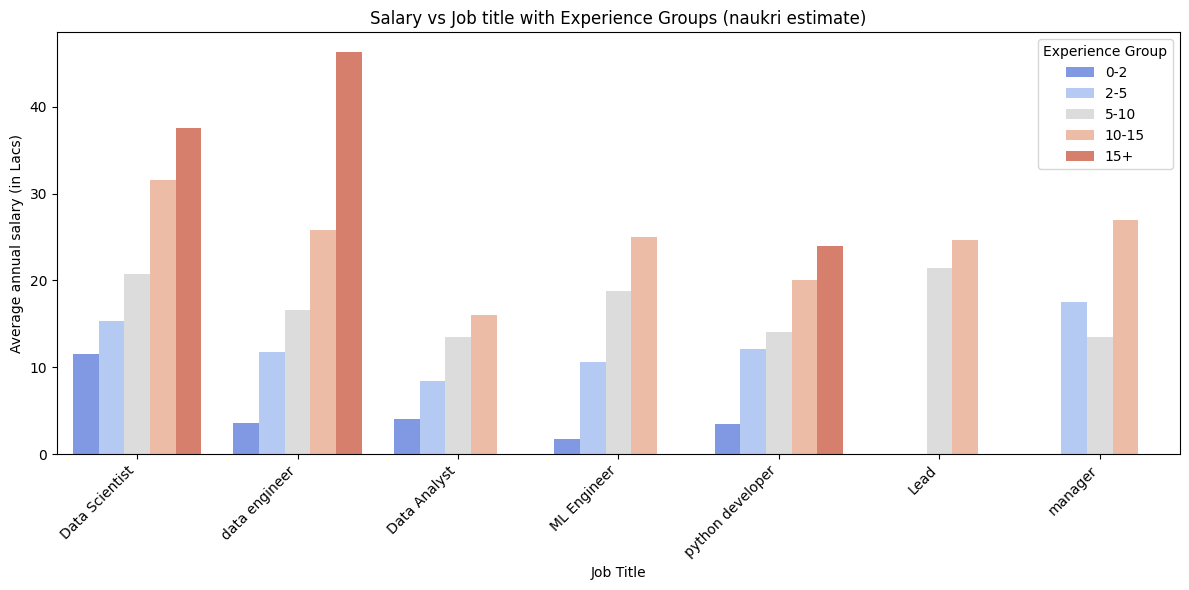

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Job title', 'avg salary (L)', and 'experience' are the respective columns in your DataFrame
# Define the intervals for grouping the 'experience' column
bins = [0, 2, 5, 10, 15, float('inf')]  # Example intervals: [0-2), [2-5), [5-10), [10-20), [20+]

# Group the 'experience' column into intervals using pd.cut()
df['experience_group'] = pd.cut(df['avg Experience (yrs)'], bins=bins, labels=['0-2', '2-5', '5-10', '10-15', '15+'])

# Create the plot using the grouped data
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Job title', y='avg salary (L)', hue='experience_group', data=df, palette='coolwarm',errorbar=None)
plt.xlabel('Job Title')
plt.ylabel('Average annual salary (in Lacs)')
plt.title('Salary vs Job title with Experience Groups (naukri estimate)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Group', loc='upper right')
plt.tight_layout()
plt.show()


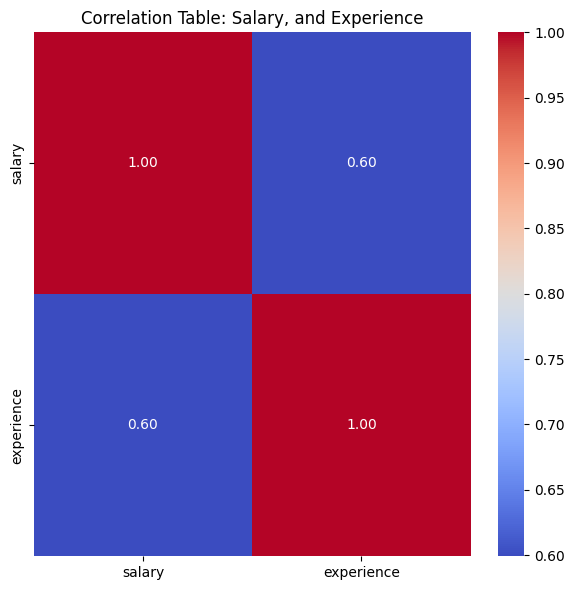

In [33]:
# correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'job title', 'salary', and 'experience' are the respective columns in your DataFrame

# Convert 'job title' to numeric representation using label encoding
job_title_numeric = pd.Categorical(df['Job title']).codes

# Create a new DataFrame with numeric columns for correlation calculation
correlation_data = pd.DataFrame({'salary': df['avg salary (L)'], 'experience': df['avg Experience (yrs)']})

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table: Salary, and Experience')
plt.tight_layout()
plt.show()


A correlation coefficient of 0.6 between salary and experience indicates a moderately positive linear relationship between the two variables. While the correlation coefficient indicates a relationship between salary and experience, it does not necessarily imply that experience directly causes an increase in salary. Other factors, such as job performance, education, industry, and market conditions, can also influence salary.